# Telecom Churn

We will try to predict the churn of some telecom company

## Agenda

1- Import Libraries

2-Load The Data

3-Handle Missing Values if existed

4-Explore the Data (EDA)

5-PreProcessing Stage

6-Predicting the Churn with different algorithms and evaluation


### 1-Import Libraries

We will import the library required for the problem

In [ ]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')

### 2-Load the data

We load the churn data into a dataframe

In [ ]:
df=pd.read_csv('E:\\ITI\\Python\\Telecom Churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

We see the first 5 rows of the data and the features of the dataset

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are 20 features and a predictor(Churn) and 7043 observation

### 3-Handle Missing Values if existed

We notice from the cell above that there aren't any missing value but we can't know for sure because the TotalCharges should be a float but it is a string so we must convert it to float first

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

We check again.

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN


Our assumption is correct, there are 11 missing values and because the observation is too many we remove the NAs directly

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 4-Explore the Data (EDA)

Now we Explore the data to gain some insights from it

We can first calculate the number of churns in our dataset

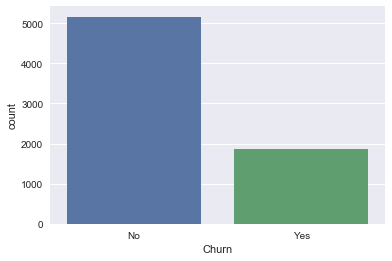

In [ ]:
sns.countplot(df.Churn)

In [ ]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

We see that only 26.57% from the customer left the country 

Let's see if the gender affect the Churn and the Total Charges as well

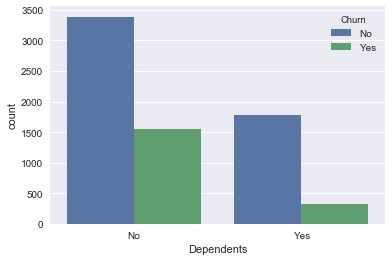

In [ ]:
sns.countplot(x=df.Dependents,hue=df.Churn)

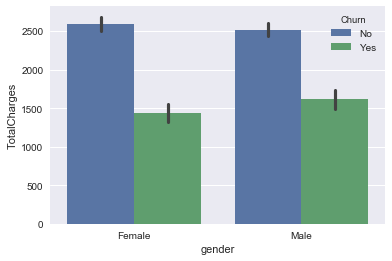

In [ ]:
sns.barplot(x=df.gender,y=df.TotalCharges,hue=df.Churn)

The gender doesn't affect the Churn as they approximatley equal

We could check the ranges of the total and monthly charges

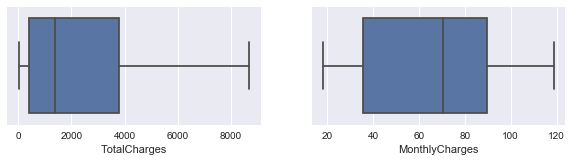

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.boxplot(df.TotalCharges)    
plt.subplot(4,2,2)
sns.boxplot(df.MonthlyCharges) 
    

The Total charges ranges between 0 and nearly 9000 while the Monthly charges ranges between 15 and 120, but the question is there any relation between them?

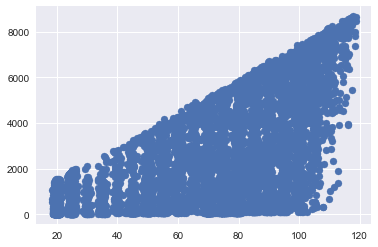

In [ ]:
plt.scatter(x=df.MonthlyCharges,y=df.TotalCharges)

In [ ]:
df.loc[:,['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


There is a 65% correlation between them which make sense as the TotalCharges dependant on the monthly charges

The tenure is how many months the client stayed in the company, so how it is correlated with the totalcharges

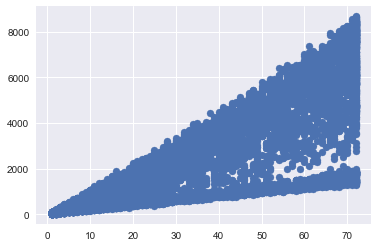

In [ ]:
plt.scatter(df.tenure,df.TotalCharges)

In [ ]:
df.loc[:,['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.00000,0.82588
TotalCharges,0.82588,1.00000


There is a very strong correlation between them

How about the internet service and total charges ?

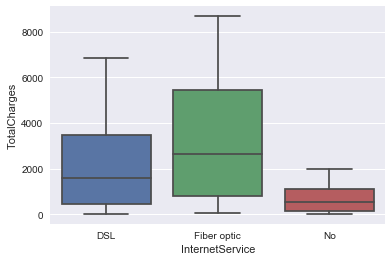

In [ ]:
sns.boxplot(df.InternetService,df.TotalCharges)

In [ ]:
def plott(x,y,df):
    plt.title(x + ' vs ' + y)
    sns.countplot(x=x,hue=y,data=df)

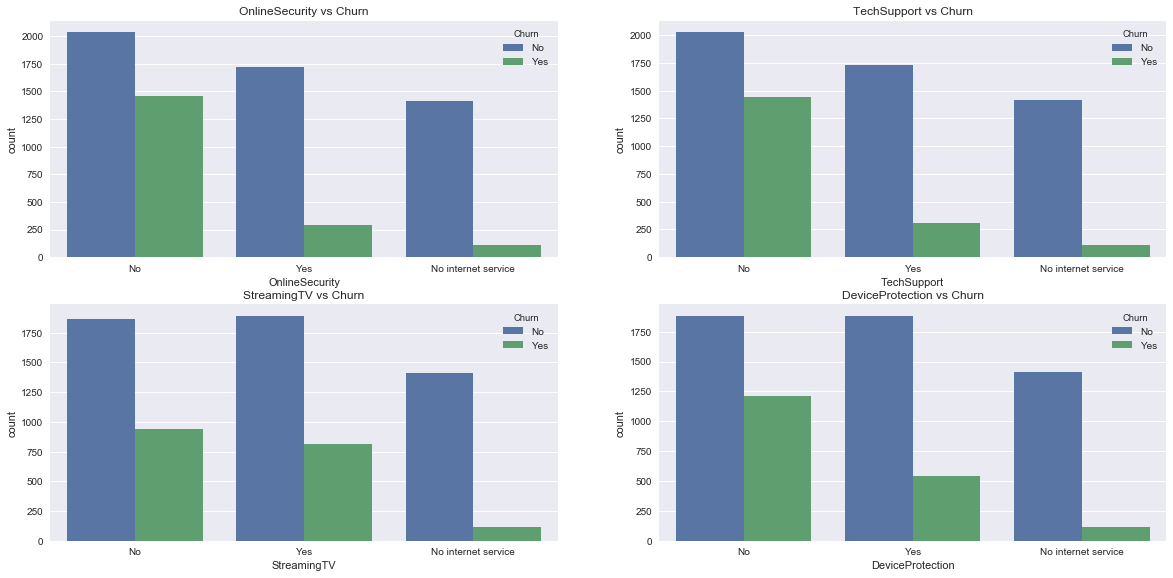

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plott('OnlineSecurity','Churn',df)
plt.subplot(4,2,2)
plott('TechSupport','Churn',df)
plt.subplot(4,2,3)
plott('StreamingTV','Churn',df)
plt.subplot(4,2,4)
plott('DeviceProtection','Churn',df)

Fiber Optics has the largest charges among them, but who leaves from them

In [ ]:
pd.crosstab(df.InternetService,df.Churn)

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


41% of Clients that uses Fiber optics left the company and I think it happened beacuse of the price

We can check the dependant and the senior citizen and their relationship with the Churn

In [ ]:
pd.crosstab(df.Dependents,df.Churn)

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


I think the singles almost half of them leave the country as it is his decision and doesn't have any supervisor

In [ ]:
pd.crosstab(df.SeniorCitizen,df.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


It's the same assumption of the previous cell

We now will check the contract with the churn

In [ ]:
pd.crosstab(df.Contract,df.Churn)

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


42% of people with month-to-month contract leave the company as they can leave after one month only 

What about payment method

In [ ]:
pd.crosstab(df.PaymentMethod,df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


The electronic check has the most left client 

But what if we used paperless billing?

In [ ]:
pd.crosstab(df.PaperlessBilling,df.Churn)

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


many online biillings lead to Churn, may be because of a problem in the infrastructure

Is the phone service can affect the churn?

In [ ]:
pd.crosstab(df.PhoneService ,df.Churn)

Churn,No,Yes
PhoneService,,
No,510,170
Yes,4653,1699


1699 customer who has phoneservice left the company

All the previous features have an effect on the churn so they will be used in the model

Let's Check the internet features 

In [ ]:
pd.crosstab(df.OnlineSecurity,df.Churn)

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


In [ ]:
pd.crosstab(df.DeviceProtection,df.Churn)

Churn,No,Yes
DeviceProtection,,
No,1883,1211
No internet service,1407,113
Yes,1873,545


In [ ]:
pd.crosstab(df.OnlineBackup,df.Churn)

Churn,No,Yes
OnlineBackup,,
No,1854,1233
No internet service,1407,113
Yes,1902,523


In [ ]:
pd.crosstab(df.TechSupport,df.Churn)

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


In [ ]:
pd.crosstab(df.StreamingTV,df.Churn)

Churn,No,Yes
StreamingTV,,
No,1867,942
No internet service,1407,113
Yes,1889,814


In [ ]:
pd.crosstab(df.StreamingMovies,df.Churn)

Churn,No,Yes
StreamingMovies,,
No,1843,938
No internet service,1407,113
Yes,1913,818


They are all have similar values so they don't affect the churn so they can be dropped

### 5-PreProcessing Stage

We will begin to make our data ready to be inserted in the model

We first start with dropping the internet features, gender, customerId

In [ ]:
df.drop(['customerID','gender','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)

In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can also remove the MultipleLine Feature

In [ ]:
df.drop('MultipleLines',axis=1,inplace=True)

We map the features with 'Yes' and 'No' values to be numeric including the Churn

In [ ]:
mapping={'Yes':1,'No':0}
df['Partner']=df['Partner'].map(mapping).astype(int)
df['Dependents']=df['Dependents'].map(mapping).astype(int)
df['PaperlessBilling']=df['PaperlessBilling'].map(mapping).astype(int)
df['Churn']=df['Churn'].map(mapping).astype(int)
df['PhoneService']=df['PhoneService'].map(mapping).astype(int)


In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1


We use get_dummies to get rid of the rest of the object columns

In [ ]:
df2=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

we see the correlation between the features

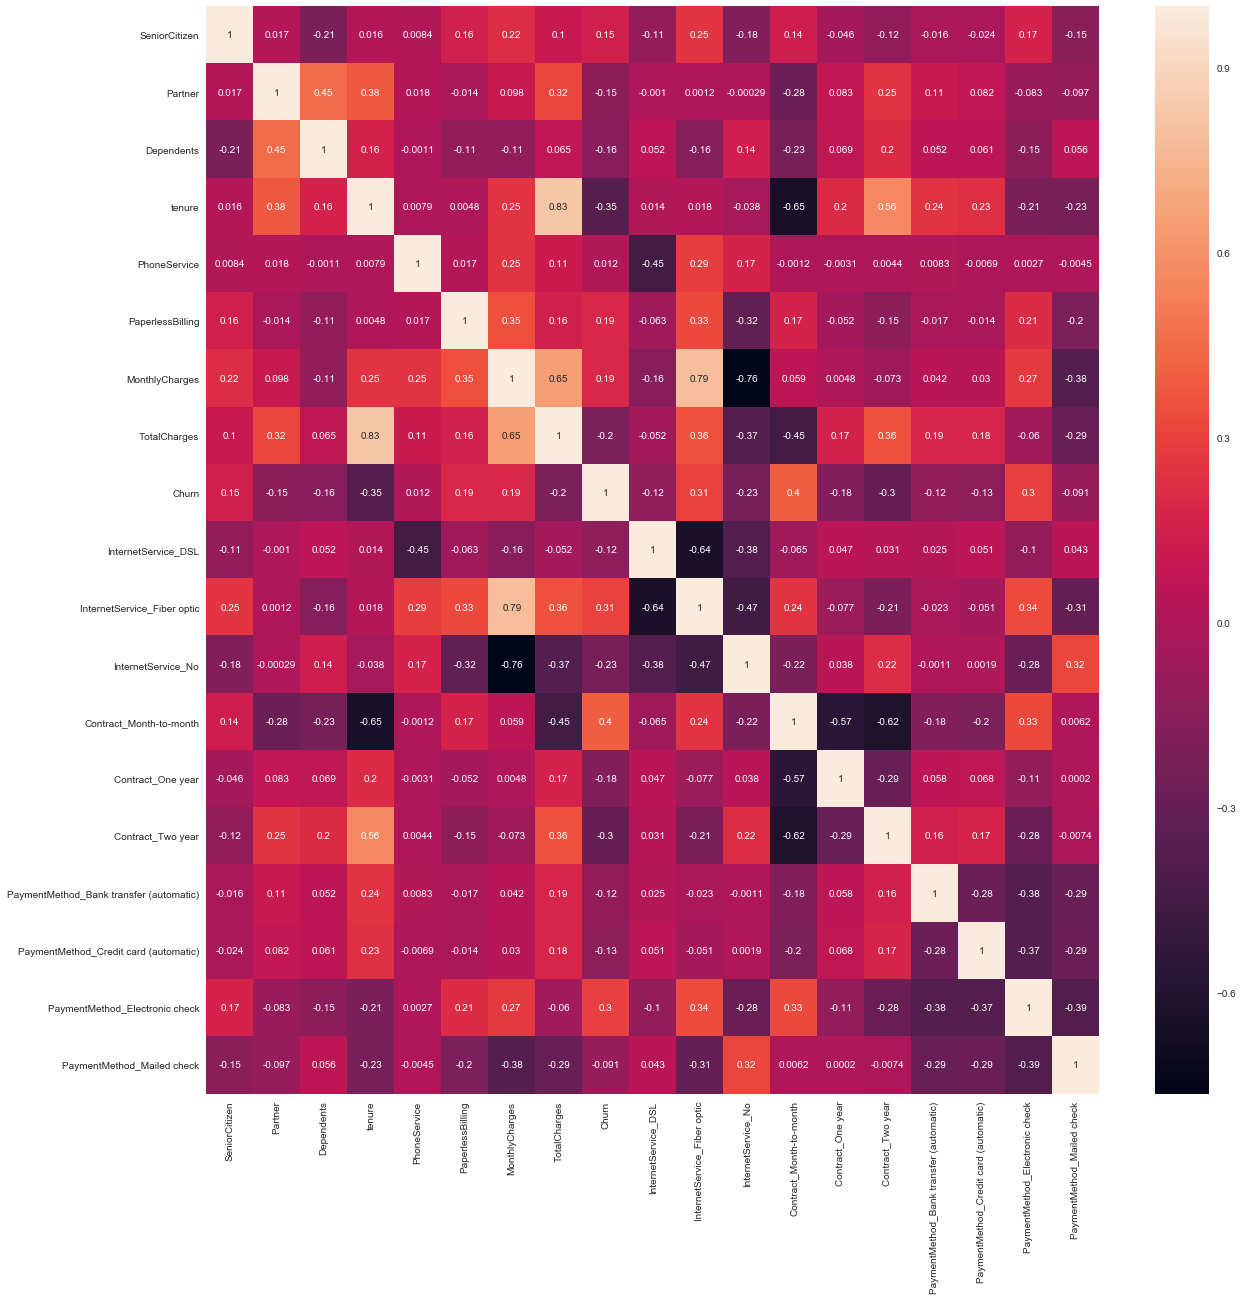

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

the tenure and the montly,total charges will be removed as they are correlated with other features

In [ ]:
df2.drop(['tenure','TotalCharges','MonthlyCharges'],axis=1,inplace=True)

In [ ]:
df2.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0


Now our data is ready for the Machine Learning Models

### 6-Predicting the Churn with different algorithms and evaluation

We will use many supervised learning algorithms for classifications such as:

1-Logistic Regression

2-Neural Networks

3-Decision Tree

4-Random Forest

5-Support Vector Machine

We will train the models in 2 cases:

1-Unbalanced Data(UnChurn >> Churn)

2-Balanced Data(UnChurn= Churn)

### Unbalanced data

First we split our data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df2, test_size=0.3)

We Prepare the data to enter the models

In [ ]:
train_x=train.drop('Churn',axis=1)
train_y=train[['Churn']]
test_x=test.drop('Churn',axis=1)
test_y=test[['Churn']]

##### 1-Using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix #for evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
lr=LogisticRegression()
lr.fit(train_x,train_y)

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We predict the test

In [ ]:
pred_y_lr=lr.predict(test_x)

We calculate the accuracy,mean square error, precison , recall, F1 Score of all algorithms

In [ ]:
cnf_matrix_lr=confusion_matrix(test_y,pred_y_lr)
r_lr=cnf_matrix_lr[1,1]/(cnf_matrix_lr[1,0]+cnf_matrix_lr[1,1]) #Recall
p_lr=cnf_matrix_lr[1,1]/(cnf_matrix_lr[0,1]+cnf_matrix_lr[1,1]) #Precision
f1_lr=2*((r_lr*p_lr)/(r_lr+p_lr)) #F1-Score
acc_lr = round(lr.score(train_x, train_y) * 100, 2) #Accuracy
MSE_lr=mean_squared_error(test_y,pred_y_lr) #MSE

##### 2-Using Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=4)
nn.fit(train_x,train_y)

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
pred_y_nn=nn.predict(test_x)

In [ ]:
cnf_matrix_nn=confusion_matrix(test_y,pred_y_nn)
r_nn=cnf_matrix_nn[1,1]/(cnf_matrix_nn[1,0]+cnf_matrix_nn[1,1]) #Recall
p_nn=cnf_matrix_nn[1,1]/(cnf_matrix_nn[0,1]+cnf_matrix_nn[1,1]) #Precision
f1_nn=2*((r_nn*p_nn)/(r_nn+p_nn)) #F1-Score
acc_nn = round(nn.score(train_x, train_y) * 100, 2) #Accuracy
MSE_nn=mean_squared_error(test_y,pred_y_nn) #MSE

##### 3- Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dc=DecisionTreeClassifier()
dc.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
pred_y_dc=dc.predict(test_x)

In [ ]:
cnf_matrix_dc=confusion_matrix(test_y,pred_y_dc)
r_dc=cnf_matrix_dc[1,1]/(cnf_matrix_dc[1,0]+cnf_matrix_dc[1,1]) #Recall
p_dc=cnf_matrix_dc[1,1]/(cnf_matrix_dc[0,1]+cnf_matrix_dc[1,1]) #Precision
f1_dc=2*((r_dc*p_dc)/(r_dc+p_dc)) #F1-Score
acc_dc = round(dc.score(train_x, train_y) * 100, 2) #Accuracy
MSE_dc=mean_squared_error(test_y,pred_y_dc) #MSE

##### 4-Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=DecisionTreeClassifier()
rf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
pred_y_rf=rf.predict(test_x)

In [ ]:
cnf_matrix_rf=confusion_matrix(test_y,pred_y_rf)
r_rf=cnf_matrix_rf[1,1]/(cnf_matrix_rf[1,0]+cnf_matrix_rf[1,1]) #Recall
p_rf=cnf_matrix_rf[1,1]/(cnf_matrix_rf[0,1]+cnf_matrix_rf[1,1]) #Precision
f1_rf=2*((r_rf*p_rf)/(r_rf+p_rf)) #F1-Score
acc_rf = round(rf.score(train_x, train_y) * 100, 2) #Accuracy
MSE_rf=mean_squared_error(test_y,pred_y_rf) #MSE

##### 5-Using Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
sv=svm.SVC()
sv.fit(train_x,train_y)
pred_y_sv=sv.predict(test_x)

c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\omar\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
cnf_matrix_sv=confusion_matrix(test_y,pred_y_sv)
r_sv=cnf_matrix_sv[1,1]/(cnf_matrix_sv[1,0]+cnf_matrix_sv[1,1]) #Recall
p_sv=cnf_matrix_sv[1,1]/(cnf_matrix_sv[0,1]+cnf_matrix_sv[1,1]) #Precision
f1_sv=2*((r_sv*p_sv)/(r_sv+p_sv)) #F1-Score
acc_sv = round(sv.score(train_x, train_y) * 100, 2) #Accuracy
MSE_sv=mean_squared_error(test_y,pred_y_sv) #MSE

## Evaluation of Unbalanced Data

We Create a data Frame to Collect all the Metrics in one Place

In [ ]:
UnBalanced=pd.DataFrame({'Accuracy':[acc_lr,acc_nn,acc_dc,acc_rf,acc_sv],'MSE':[MSE_lr,MSE_nn,MSE_dc,MSE_rf,MSE_sv],'Model':['Logistic Regression','Neural Networks','Decision Tree','Random Forest','Support Vector Machine'],'Recall':[r_lr,r_nn,r_dc,r_rf,r_sv],'Precision':[p_lr,p_nn,p_dc,p_rf,p_sv],'F1-Score':[f1_lr,f1_nn,f1_dc,f1_rf,f1_sv]},columns=['Model','Accuracy','MSE','Precision','Recall','F1-Score'])


In [ ]:
UnBalanced

,Model,Accuracy,MSE,Precision,Recall,F1-Score
0,Logistic Regression,77.65,0.223697,0.617068,0.487047,0.544402
1,Neural Networks,77.83,0.233649,0.585657,0.507772,0.543941
2,Decision Tree,79.07,0.238863,0.573099,0.507772,0.538462
3,Random Forest,79.07,0.238863,0.573099,0.507772,0.538462
4,Support Vector Machine,77.35,0.227962,0.606987,0.480138,0.536162


### Confusion matrix

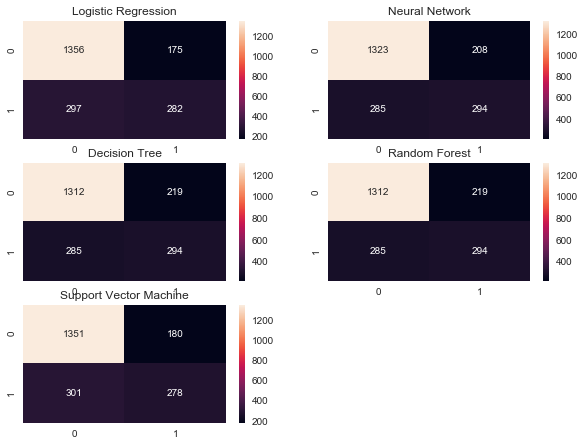

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
plt.title('Logistic Regression')
sns.heatmap(cnf_matrix_lr,annot=True,fmt='d')    
plt.subplot(4,2,2)
plt.title('Neural Network')
sns.heatmap(cnf_matrix_nn,annot=True,fmt='d')
plt.subplot(4,2,3)
plt.title('Decision Tree')
sns.heatmap(cnf_matrix_dc,annot=True,fmt='d')
plt.subplot(4,2,4)
plt.title('Random Forest')
sns.heatmap(cnf_matrix_rf,annot=True,fmt='d')
plt.subplot(4,2,5)
plt.title('Support Vector Machine')
sns.heatmap(cnf_matrix_sv,annot=True,fmt='d')

The Performance is poor with UnBalanced Data So we will try to balance the data

# 2- Balanced Data

In [ ]:
churn_count=len(df2[df2['Churn']==1])
churn_index=df2[df2['Churn']==1].index
norm_index=df2[df2['Churn']==0].index
rand_norm_index=np.random.choice(norm_index,churn_count)
balanced_index=np.concatenate([rand_norm_index,churn_index])
balanced_data=df2.loc[balanced_index]

We repeat the previous steps again

In [ ]:
train, test=train_test_split(balanced_data, test_size=0.3)

In [ ]:
train_x=train.drop('Churn',axis=1)
train_y=train[['Churn']]
test_x=test.drop('Churn',axis=1)
test_y=test[['Churn']]

In [ ]:
Balanced=pd.DataFrame({'Accuracy':[acc_lr,acc_nn,acc_dc,acc_rf,acc_sv],'MSE':[MSE_lr,MSE_nn,MSE_dc,MSE_rf,MSE_sv],'Model':['Logistic Regression','Neural Networks','Decision Tree','Random Forest','Support Vector Machine'],'Recall':[r_lr,r_nn,r_dc,r_rf,r_sv],'Precision':[p_lr,p_nn,p_dc,p_rf,p_sv],'F1-Score':[f1_lr,f1_nn,f1_dc,f1_rf,f1_sv]},columns=['Model','Accuracy','MSE','Precision','Recall','F1-Score'])


In [ ]:
Balanced

,Model,Accuracy,MSE,Precision,Recall,F1-Score
0,Logistic Regression,73.89,0.237968,0.718553,0.838532,0.773920
1,Neural Networks,74.20,0.237077,0.721781,0.833028,0.773424
2,Decision Tree,78.10,0.261141,0.711409,0.777982,0.743208
3,Random Forest,78.10,0.261141,0.710702,0.779817,0.743657
4,Support Vector Machine,73.89,0.245989,0.701046,0.860550,0.772652


In [ ]:
UnBalanced

,Model,Accuracy,MSE,Precision,Recall,F1-Score
0,Logistic Regression,77.65,0.223697,0.617068,0.487047,0.544402
1,Neural Networks,77.83,0.233649,0.585657,0.507772,0.543941
2,Decision Tree,79.07,0.238863,0.573099,0.507772,0.538462
3,Random Forest,79.07,0.238863,0.573099,0.507772,0.538462
4,Support Vector Machine,77.35,0.227962,0.606987,0.480138,0.536162


# Conclusion

When we balanced the data the performance got better as the data isn't skewed anymore
The Support Vector Machine Has the Highest Recall so we can use it.